# YouTube Dataset
#### Черников Александр Алексеевич РИ-230910

## Часть 1. Подготовка к работе
#### Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### Читаем csv файл

In [2]:
df = pd.read_csv('/kaggle/input/youtube-ru/YouTube_RU.csv', delimiter=',', encoding='utf-8')
rows, columns = df.shape
display(df.head(5))
print(f'Количество строк: {rows} \nКоличество колонок: {columns}')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


Количество строк: 40739 
Количество колонок: 16


Оригинальный датасет имел проблему с кодированием текста из-за чего пришлось устанавливать его и сохранять с правильной кодировкой.

Датасет имеет следующие колонки:

video_id - уникальный идентификатор видео.(строка)

trending_date - дата нахождения видео на вкладке "в тренде". Видео может несколько дней находится на вкладке.(дата)

title - заголовок видео.(строка)

channel_title - название канала.(строка)

category_id - уникальный идентификатор категории.(число)

publish_time - дата публикации видео.(дата)

tags - тэги видео.(строка)

views - количество просмотров.(число)

likes - количество лайков.(число)

dislikes - количество дизлайков.(число)

comment_count - количество комментариев.(число)

thumbnail_link - ссылка на обложку видео.(текст)

comments_disabled - отключены\включены комментарии.(bool)

ratings_disabled - отключен\включен рейтинг.(bool)

video_error_or_removed - ошибка или удаленно(bool)

description - описание видео.(строка)


Словарь с идентификаторами и названиями категорий встречающихся в датасете. Будет использован далее для наглядности анализа.

In [3]:
category_names = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    43: "Shows"
}

## Часть 2. EDA 

### Корреляция параметров
Проверим корреляцию начальных параметров датасета.

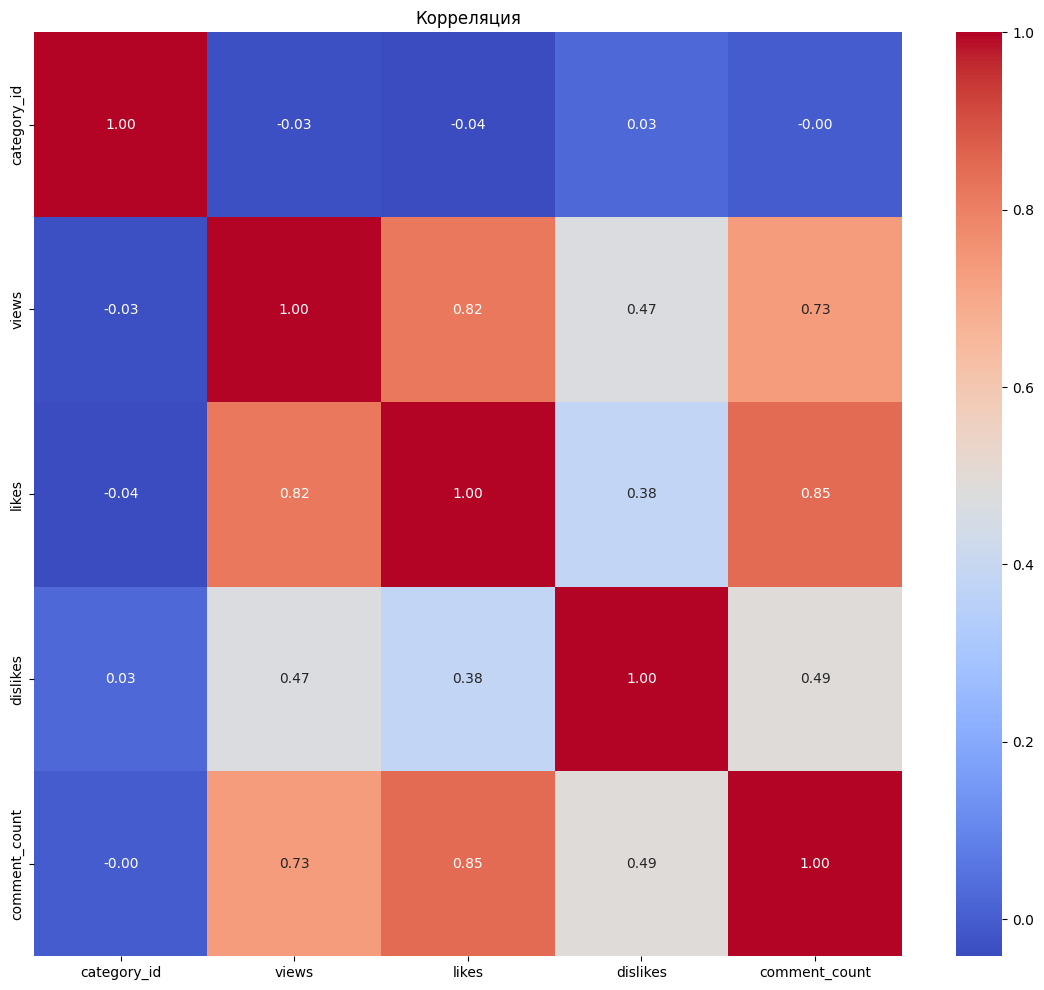

In [4]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция')
plt.show()

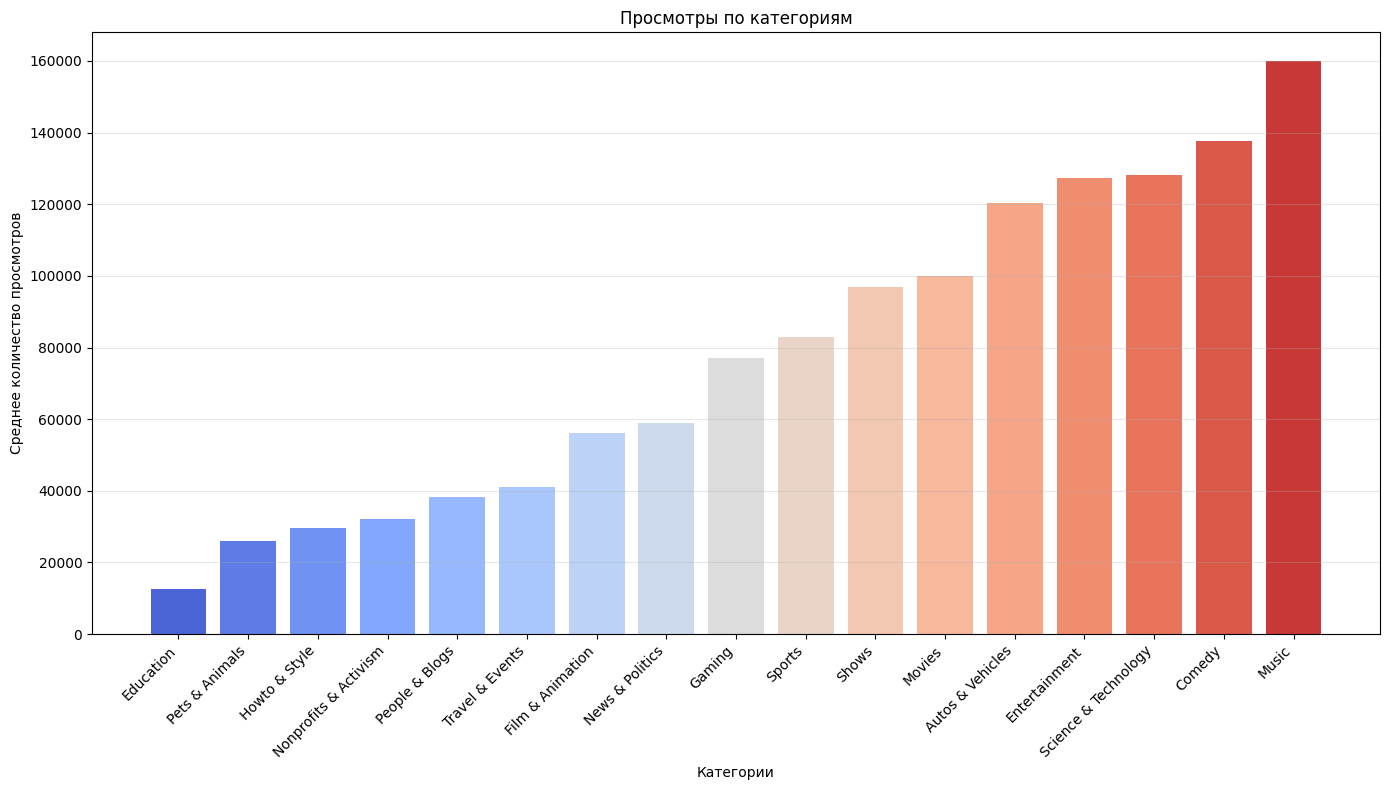

In [5]:
category_groups = df.groupby('category_id')['views'].median().reset_index()

category_groups['category_name'] = category_groups['category_id'].map(category_names)

category_groups_sorted = category_groups.sort_values('views', ascending=True)

plt.figure(figsize=(14, 8))
plt.bar(
    category_groups_sorted['category_name'],
    category_groups_sorted['views'],
    color=sns.color_palette('coolwarm', len(category_groups_sorted))
)
plt.xlabel('Категории')
plt.ylabel('Среднее количество просмотров')
plt.title('Просмотры по категориям')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Часть 3. Feature Engineering

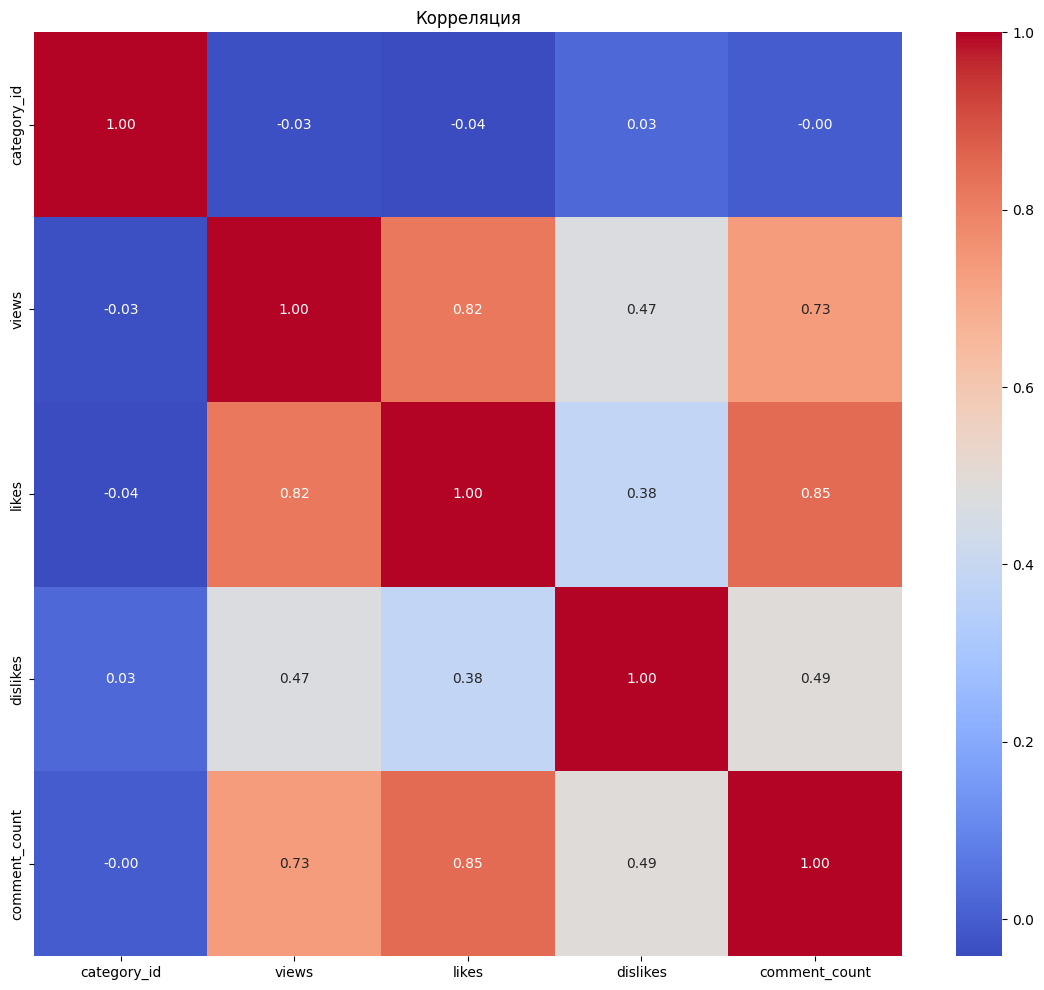

In [6]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция')
plt.show()

Переведем trending_date и publish_time в datetime формат, также вынесем час и день недели публикации в отдельные колонки для дальнейшего анализа

In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])

df['publish_hour'] = df['publish_time'].dt.hour
df['publish_dow'] = df['publish_time'].dt.dayofweek

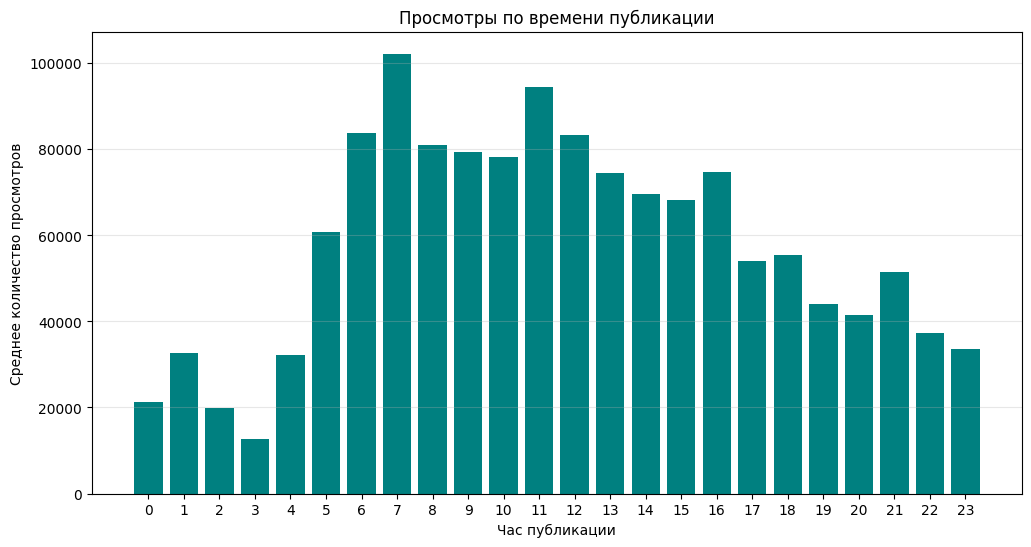

In [8]:
hour_groups = df.groupby('publish_hour')['views'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(
    hour_groups['publish_hour'],
    hour_groups['views'],
    color='teal'
)
plt.xlabel('Час публикации')
plt.ylabel('Среднее количество просмотров')
plt.grid(axis='y', alpha=0.3)
plt.title('Просмотры по времени публикации')
plt.xticks(range(0, 24))
plt.show()

Добавим колонки с длинной заголовка и количеством тегов. 

In [9]:
df['title_length'] = df['title'].apply(len)

df['tags'] = df['tags'].apply(lambda x: '' if str(x).strip().lower() == '[none]' else x)
df['tags_count'] = df['tags'].apply(lambda x: len(x.split('|')))

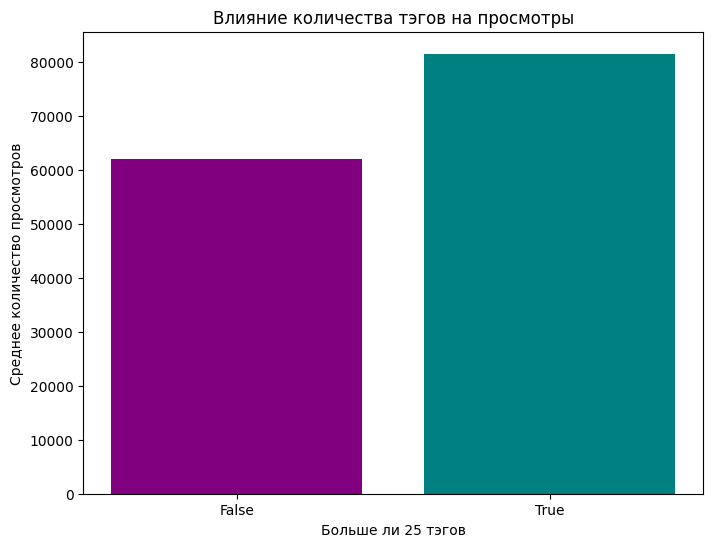

In [10]:
df['many_tags'] = df['tags_count'] > 25
tag_groups = df.groupby('many_tags')['views'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(
    tag_groups['many_tags'].astype(str),
    tag_groups['views'],
    color=['purple', 'teal']
)
plt.xlabel('Больше ли 25 тэгов')
plt.ylabel('Среднее количество просмотров')
plt.title('Влияние количества тэгов на просмотры')
plt.show()

Добавим колонки с суммой всех взаимодействий и соотношением лайков к дизлайкам

In [11]:
df['total_interactions'] = df['likes'] + df['comment_count'] + df['dislikes']
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)

Добавим колонки с количеством слов в описании и наличием ссылок, также добавим специальную колонку для выделения видео без описаний.

In [12]:
df['description_missing'] = df['description'].isnull()
df['description'] = df['description'].fillna('')
df['description_word_count'] = df['description'].apply(lambda x: len(x.split()))
df['has_links'] = df['description'].str.contains('http://|https://').astype(int)

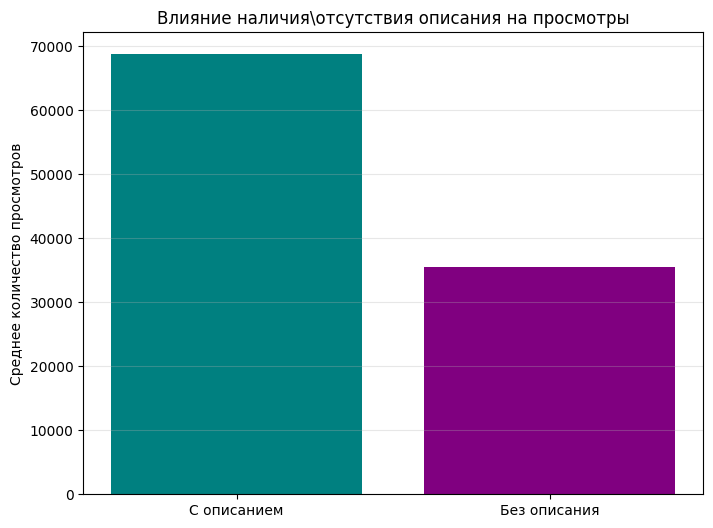

In [13]:
desc_groups = df.groupby('description_missing')['views'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(
    ['С описанием', 'Без описания'],
    desc_groups['views'],
    color=['teal', 'purple']
)
plt.ylabel('Среднее количество просмотров')
plt.title('Влияние наличия\отсутствия описания на просмотры')
plt.grid(axis='y', alpha=0.3)
plt.show()